In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_theme()

In [18]:
from datasetsforecast.hierarchical import HierarchicalData
from hierarchicalforecast.utils import aggregate, HierarchicalPlot

from neuralforecast.utils import augment_calendar_df

INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmp3xmjec76
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmp3xmjec76/_remote_module_non_scriptable.py


In [19]:
def sort_df_hier(Y_df, S):
    # NeuralForecast core, sorts unique_id lexicographically
    # by default, this method matches S_df and Y_hat_df hierarchical order.
    Y_df.unique_id = Y_df.unique_id.astype('category')
    Y_df.unique_id = Y_df.unique_id.cat.set_categories(S.index)
    Y_df = Y_df.sort_values(by=['unique_id', 'ds'])
    return Y_df

# Load hierarchical dataset
Y_df, S_df, tags = HierarchicalData.load('./data', 'TourismLarge')
Y_df['ds'] = pd.to_datetime(Y_df['ds'])
Y_df = sort_df_hier(Y_df, S_df)

Y_df, _ = augment_calendar_df(df=Y_df, freq='M')

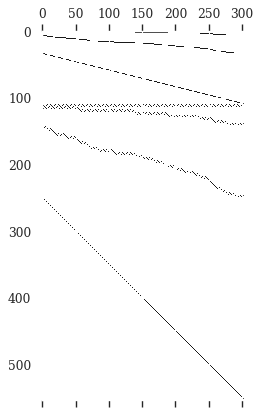

In [20]:
# Here we plot the hierarchical constraints matrix
hplot = HierarchicalPlot(S=S_df, tags=tags)
hplot.plot_summing_matrix()


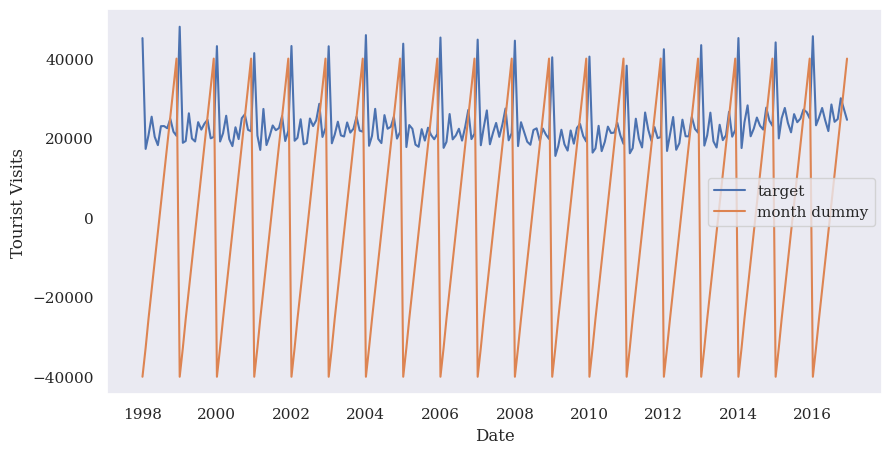

In [21]:
# Here we plot the top most series from the dataset
# that corresponds to the total tourist monthly visits to Australia
plt.figure(figsize=(10,5))
plt.plot(Y_df[Y_df['unique_id']=='TotalAll']['ds'], 
         Y_df[Y_df['unique_id']=='TotalAll']['y'], label='target')
plt.plot(Y_df[Y_df['unique_id']=='TotalAll']['ds'], 
         Y_df[Y_df['unique_id']=='TotalAll']['month']*80000, label='month dummy')
plt.xlabel('Date')
plt.ylabel('Tourist Visits')
plt.legend()
plt.grid()
plt.show()
plt.close()
